In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [4]:
# Load the data to a dataframe
df = pd.read_csv(
    r"C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Pandas\data\health_data.csv"
)
df.head()

,weight,height,gender
0,65.6,174.0,1
1,71.8,175.3,1
2,80.7,193.5,1
3,72.6,186.5,1
4,78.8,187.2,1


In [16]:
# Create a logistic regression model and fit it to the data
X = df[["height"]]
y = df[["gender"]]

model = LogisticRegression()
model.fit(X, y)

# Display the model parameters
print(f"Intercept: {model.intercept_[0]}, Coefficient: {model.coef_[0][0]}")

Intercept: -46.73774969612497, Coefficient: 0.2727700849940167


c:\Users\jorda\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
# Predict the gender based on height
df["y_pred"] = model.predict(X)

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [43]:
# Load the data to a DataFrame
df = pd.read_csv(
    r"C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Pandas\data\health_data.csv"
)
df.head()

# Split the data into train and test
train_df, test_df = train_test_split(df, test_size=0.3, random_state=1)

# Check the shape of the train and test DataFrames
train_df.shape, test_df.shape

((354, 3), (153, 3))

In [53]:
# Create the model
model = LogisticRegression()

# Fit the model on the train set
model.fit(X=train_df[["weight", "height"]], y=train_df["gender"])

# Show the model parameters
print(
    f"Intercept: {model.intercept_[0]}, Coefficient A: {model.coef_[0][0]}, Coefficient B: {model.coef_[0][1]}"
)

Intercept: -40.74788960962945, Coefficient A: 0.08936698682129875, Coefficient B: 0.20250172340383682


In [54]:
# Predict the values on the test set
test_df["predicted_gender"] = model.predict(test_df[["weight", "height"]])

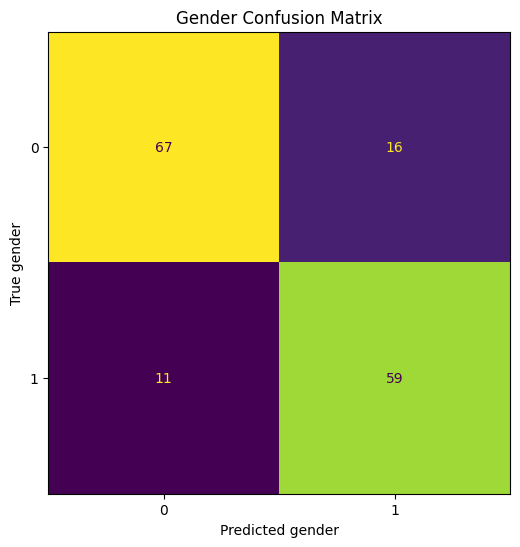

In [69]:
# Create the confusion matrix

cm = confusion_matrix(
    y_true=test_df["gender"],
    y_pred=test_df["predicted_gender"],
)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
disp.ax_.set_title("Gender Confusion Matrix")
disp.ax_.set_xlabel("Predicted gender")
disp.ax_.set_ylabel("True gender")
disp.im_.colorbar.remove()
disp.figure_.set_size_inches(6, 6)

In [121]:
# Print the values of the confusion matrix
print(
    f'Males predicted to be males: {
        cm[0][0]
        }\nFemales predicted to be males: {
            cm[0][1]
            }\nMales predicted to be females: {
                cm[1][0]
                }\nFemales predicted to be females: {
                    cm[1][1]
                    }'
    )

Males predicted to be males: 67
Females predicted to be males: 16
Males predicted to be females: 11
Females predicted to be females: 59


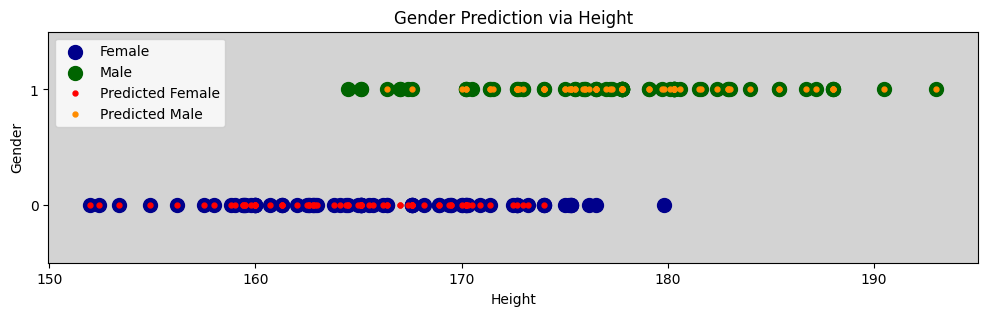

In [120]:
# Plot the test data and the gender predictions
ax = test_df[test_df["gender"] == 0].plot.scatter(
    x="height", y="gender", c="DarkBlue", label="Female", marker="o", s=100
)
ax = test_df[test_df["gender"] == 1].plot.scatter(
    x="height", y="gender", c="DarkGreen", label="Male", ax=ax, marker="o", s=100
)
ax = test_df[test_df["predicted_gender"] == 0].plot.scatter(
    x="height",
    y="predicted_gender",
    c="Red",
    label="Predicted Female",
    ax=ax,
    marker=".",
    s=50,
)
ax = test_df[test_df["predicted_gender"] == 1].plot.scatter(
    x="height",
    y="predicted_gender",
    c="DarkOrange",
    label="Predicted Male",
    ax=ax,
    marker=".",
    s=50,
)
ax.figure.set_size_inches(12, 3)
ax.set_yticks([0, 1])
ax.set_title("Gender Prediction via Height")
ax.set_xlabel("Height")
ax.set_ylabel("Gender")
ax.set_ylim(-0.5, 1.5)
ax.set_facecolor("lightgrey")